In [2]:
#!pip install tensorflow
#!pip install keras

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [4]:
data = pd.read_csv('./krkopt.data')
data.head()

,a,1,b,3,c,2,draw
0,a,1,c,1,c,2,draw
1,a,1,c,1,d,1,draw
2,a,1,c,1,d,2,draw
3,a,1,c,2,c,1,draw
4,a,1,c,2,c,3,draw


In [5]:
data.columns = ['White King file (column)','White King rank (row)','White Rook file','White Rook rank',
                'Black King file','Black King rank','optimal depth-of-win for White in 0 to 16 moves']

data.head()

,White King file (column),White King rank (row),White Rook file,White Rook rank,Black King file,Black King rank,optimal depth-of-win for White in 0 to 16 moves
0,a,1,c,1,c,2,draw
1,a,1,c,1,d,1,draw
2,a,1,c,1,d,2,draw
3,a,1,c,2,c,1,draw
4,a,1,c,2,c,3,draw


In [6]:
data = data[(data.astype(str) != ' ?').all(axis=1)]

x = data.drop('optimal depth-of-win for White in 0 to 16 moves', axis = 1)
y = data['optimal depth-of-win for White in 0 to 16 moves']

a = data.drop('Black King rank', axis = 1)
b = data['Black King rank']

In [7]:
onehot_x = ['White King file (column)','White Rook file','Black King file']
onehot_a = ['White King file (column)','White Rook file','Black King file','optimal depth-of-win for White in 0 to 16 moves']

In [8]:
from sklearn.preprocessing import  OneHotEncoder #將不同組的名城轉變成數字類別 

for i in x.columns:
    if i in onehot_x:
        temp = x[i].values.reshape(-1, 1).tolist()
        encoder = OneHotEncoder()
        temp_array = encoder.fit_transform(temp).toarray()
        data_hot_encoded = pd.DataFrame(temp_array, index=x.index)

        #Extract only the columns that didnt need to be encoded
        data_other_cols = x.drop(i,axis = 1)

        #Concatenate the two dataframes : 
        x = pd.concat([data_hot_encoded, data_other_cols], axis=1)

y = encoder.fit_transform(y.values.reshape(-1,1)).toarray()
x

,0,1,2,3,4,5,6,7,0,1,...,5,6,7,0,1,2,3,White King rank (row),White Rook rank,Black King rank
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,2
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,2
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28050,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,7,5
28051,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,7,6
28052,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,7,7
28053,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,7,5


In [9]:
from sklearn.preprocessing import  OneHotEncoder #將不同組的名城轉變成數字類別 

for i in a.columns:
    if i in onehot_a:
        temp = a[i].values.reshape(-1, 1).tolist()
        encoder = OneHotEncoder()
        temp_array = encoder.fit_transform(temp).toarray()
        data_hot_encoded = pd.DataFrame(temp_array, index=a.index)

        #Extract only the columns that didnt need to be encoded
        data_other_cols = a.drop(i,axis = 1)

        #Concatenate the two dataframes : 
        a = pd.concat([data_hot_encoded, data_other_cols], axis=1)
a

,0,1,2,3,4,5,6,7,8,9,...,4,5,6,7,0,1,2,3,White King rank (row),White Rook rank
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,7
28051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,7
28052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,7
28053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,7


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2, random_state = 1)

In [11]:
#Feature scaling 
#什麼是特徵縮放？

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

print(x_train.shape)
print('===================')
print(len(x_test))

sc_a = StandardScaler()
a_train = sc_a.fit_transform(a_train)
a_test = sc_a.transform(a_test)

print('===================')
print(a_train.shape)
print('===================')
print(a_test.shape)

(22444, 23)
5611
(22444, 40)
(5611, 40)


In [12]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping
from keras import backend as K

In [13]:
model_num = Sequential()
model_categorical = Sequential()

In [14]:
model_num.add(Dense(units = 512, input_dim = x_train.shape[1], activation='relu'))
model_categorical.add(Dense(units = 256, input_dim = a_train.shape[1], activation='relu'))

In [15]:
model_num.add(Dense(units = 338, activation='relu'))
model_categorical.add(BatchNormalization())
model_categorical.add(Dense(units = 338, activation='relu'))

In [16]:
model_categorical.add(Dense(units = 169, activation='relu'))

In [17]:
model_categorical.add(Dense(units = 148, activation='relu'))

In [18]:
model_categorical.add(Dense(units = 98, activation='relu'))

In [19]:
model_num.add(Dense(units = 18, activation = 'softmax'))
model_categorical.add(Dense(units = 4, activation = 'linear'))

In [20]:
print(model_num.summary())
print(model_categorical.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               12288     
                                                                 
 dense_2 (Dense)             (None, 338)               173394    
                                                                 
 dense_7 (Dense)             (None, 18)                6102      
                                                                 
Total params: 191,784
Trainable params: 191,784
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               10496     
                                                                 
 batch_normalization (B

In [21]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def mean_absolute_error(y_true, y_pred):
        return K.mean(K.square(y_pred - y_true), axis=-1)

model_num.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[f1])
model_categorical.compile(loss='mae', optimizer= keras.optimizers.Adam(learning_rate=0.001), metrics=[mean_absolute_error]) #optimizer= keras.optimizers.Adam(learning_rate=0.01)
es_num = EarlyStopping(monitor='val_f1', patience=10, mode='max', verbose=1)
es_catogorical = EarlyStopping(monitor='val_mean_absolute_error', patience=10, mode='auto', verbose=1)

In [22]:
train_history_num = model_num.fit(x=x_train,
              y=y_train,
              validation_data=(x_test, y_test),
              epochs=100, batch_size=200,callbacks=[es_num], verbose=2)

Epoch 1/100
113/113 - 4s - loss: 0.1899 - f1: 0.0474 - val_loss: 0.1505 - val_f1: 0.1257 - 4s/epoch - 39ms/step
Epoch 2/100
113/113 - 1s - loss: 0.1389 - f1: 0.1978 - val_loss: 0.1302 - val_f1: 0.3010 - 1s/epoch - 9ms/step
Epoch 3/100
113/113 - 1s - loss: 0.1229 - f1: 0.3788 - val_loss: 0.1188 - val_f1: 0.4264 - 1s/epoch - 9ms/step
Epoch 4/100
113/113 - 1s - loss: 0.1135 - f1: 0.4731 - val_loss: 0.1128 - val_f1: 0.4756 - 1s/epoch - 9ms/step
Epoch 5/100
113/113 - 1s - loss: 0.1071 - f1: 0.5195 - val_loss: 0.1076 - val_f1: 0.5195 - 1s/epoch - 10ms/step
Epoch 6/100
113/113 - 1s - loss: 0.1023 - f1: 0.5512 - val_loss: 0.1037 - val_f1: 0.5367 - 1s/epoch - 10ms/step
Epoch 7/100
113/113 - 1s - loss: 0.0989 - f1: 0.5706 - val_loss: 0.1010 - val_f1: 0.5645 - 1s/epoch - 10ms/step
Epoch 8/100
113/113 - 1s - loss: 0.0956 - f1: 0.5909 - val_loss: 0.0985 - val_f1: 0.5673 - 1s/epoch - 11ms/step
Epoch 9/100
113/113 - 1s - loss: 0.0927 - f1: 0.6046 - val_loss: 0.0960 - val_f1: 0.5814 - 1s/epoch - 12ms/

Epoch 74/100
113/113 - 1s - loss: 0.0289 - f1: 0.9218 - val_loss: 0.0620 - val_f1: 0.8036 - 1s/epoch - 10ms/step
Epoch 75/100
113/113 - 1s - loss: 0.0285 - f1: 0.9231 - val_loss: 0.0629 - val_f1: 0.7994 - 1s/epoch - 10ms/step
Epoch 76/100
113/113 - 1s - loss: 0.0281 - f1: 0.9253 - val_loss: 0.0622 - val_f1: 0.8003 - 1s/epoch - 10ms/step
Epoch 77/100
113/113 - 1s - loss: 0.0278 - f1: 0.9255 - val_loss: 0.0606 - val_f1: 0.8130 - 1s/epoch - 10ms/step
Epoch 78/100
113/113 - 1s - loss: 0.0274 - f1: 0.9267 - val_loss: 0.0627 - val_f1: 0.8051 - 1s/epoch - 10ms/step
Epoch 79/100
113/113 - 1s - loss: 0.0274 - f1: 0.9260 - val_loss: 0.0604 - val_f1: 0.8105 - 1s/epoch - 10ms/step
Epoch 80/100
113/113 - 1s - loss: 0.0268 - f1: 0.9289 - val_loss: 0.0608 - val_f1: 0.8137 - 1s/epoch - 10ms/step
Epoch 81/100
113/113 - 1s - loss: 0.0265 - f1: 0.9293 - val_loss: 0.0610 - val_f1: 0.8083 - 1s/epoch - 10ms/step
Epoch 82/100
113/113 - 1s - loss: 0.0258 - f1: 0.9340 - val_loss: 0.0604 - val_f1: 0.8145 - 1s/e

In [23]:
train_history_catogorical = model_categorical.fit(x=a_train,
              y=b_train,
              validation_data=(a_test, b_test),
              epochs=30, batch_size=200,callbacks=[es_catogorical], verbose=2)

Epoch 1/30
113/113 - 3s - loss: 1.5533 - mean_absolute_error: 4.2104 - val_loss: 2.7889 - val_mean_absolute_error: 11.2200 - 3s/epoch - 26ms/step
Epoch 2/30
113/113 - 1s - loss: 1.2336 - mean_absolute_error: 2.6607 - val_loss: 1.8220 - val_mean_absolute_error: 5.4849 - 1s/epoch - 11ms/step
Epoch 3/30
113/113 - 1s - loss: 1.1744 - mean_absolute_error: 2.4702 - val_loss: 1.2612 - val_mean_absolute_error: 2.7511 - 1s/epoch - 11ms/step
Epoch 4/30
113/113 - 1s - loss: 1.1463 - mean_absolute_error: 2.3611 - val_loss: 1.1838 - val_mean_absolute_error: 2.4555 - 1s/epoch - 11ms/step
Epoch 5/30
113/113 - 1s - loss: 1.1241 - mean_absolute_error: 2.2911 - val_loss: 1.1664 - val_mean_absolute_error: 2.4008 - 1s/epoch - 11ms/step
Epoch 6/30
113/113 - 1s - loss: 1.1021 - mean_absolute_error: 2.2234 - val_loss: 1.1676 - val_mean_absolute_error: 2.3598 - 1s/epoch - 11ms/step
Epoch 7/30
113/113 - 1s - loss: 1.0821 - mean_absolute_error: 2.1590 - val_loss: 1.1514 - val_mean_absolute_error: 2.3568 - 1s/ep

In [24]:
def show_train_history(train_history,train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['test_acc', 'test_loss'], loc='upper left')
    plt.show()

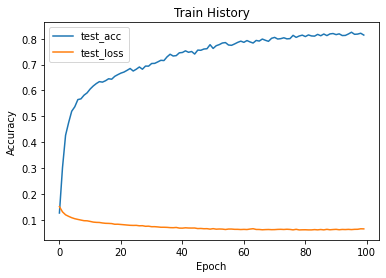

In [25]:
show_train_history(train_history_num,'val_f1','val_loss')
#show_train_history(train_history_num,'f1','val_f1')
#show_train_history(train_history_num,'loss','val_loss')

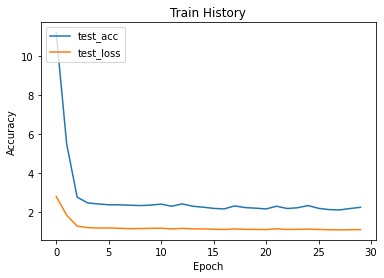

In [26]:
show_train_history(train_history_catogorical,'val_mean_absolute_error','val_loss')
#show_train_history(train_history_catogorical,'mean_absolute_error','val_mean_absolute_error')
#show_train_history(train_history_catogorical,'loss','val_loss')

In [27]:
score_num = model_num.evaluate(x_test, y_test)
score_catogorical = model_categorical.evaluate(a_test, b_test)

176/176 [==============================] - 1s 3ms/step - loss: 1.0816 - mean_absolute_error: 2.2282


In [28]:
def plot_text_labels_prediction(text,labels,prediction,idx,num=10):
    if num>25: num=25 
    for i in range(0, num):
        print("label=" +str(labels[idx])+
              ",predict="+str(prediction[idx])) 
        print("==============================")
        
        idx+=1
        if idx >= len(text):
            break
    plt.show()

In [29]:
prediction_num = model_num.predict(x_test)
prediction_catogorical = model_categorical.predict(a_test)

prediction_num = np.argmax(prediction_num,axis=1)
prediction_catogorical = np.max(prediction_catogorical,axis=1)

prediction_catogorical = prediction_catogorical.astype(int)

In [30]:
plot_text_labels_prediction(x_test,y_test,prediction_num,idx=0,num=25)
print('')
plot_text_labels_prediction(a_test,b_test.values,prediction_catogorical,idx=0,num=25)

label=[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],predict=0
label=[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],predict=0
label=[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],predict=0
label=[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],predict=0
label=[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],predict=0
label=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.],predict=15
label=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.],predict=13
label=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.],predict=13
label=[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],predict=2
label=[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],predict=3
label=[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],predict=2
label=[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],predict=6
label=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.],predict=2
label=[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

In [31]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [32]:
y_test = np.argmax(y_test,axis=1)
print(precision_score(y_test,prediction_num, average='micro'))
print(recall_score(y_test,prediction_num, average='micro'))

0.814115130992693
0.814115130992693


In [33]:
rmse = sqrt(mean_squared_error(b_test,prediction_catogorical))

In [34]:
print(rmse)
print(mean_absolute_percentage_error(b_test,prediction_catogorical))

1.5491703300346393
0.29602226918213376
